<a href="https://colab.research.google.com/github/AnitaKirkovska/Machine_Learning_Class/blob/master/HW3/t_SNE_Visualization_FineTuned_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load the fine tuned model**

In [22]:
from google.colab import files

uploaded = files.upload()

Saving cats_and_dogs_fine_1.h5 to cats_and_dogs_fine_1 (1).h5


In [25]:
from keras import models
from keras.models import load_model

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

model = load_model('cats_and_dogs_fine_1.h5')
model.summary()

layer = model.get_layer('dense_1')
layer_output = layer.output

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 4, 4, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 22,122,049
Trainable params: 4,457,473
Non-trainable params: 17,664,576
_________________________________________________________________


**Preprocessing the image**

In [29]:
from keras.preprocessing.image import ImageDataGenerator

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=1000,
    class_mode='binary')

images, labels = next(validation_generator)
print(images.shape)
print(labels.shape)

Found 1000 images belonging to 2 classes.
(1000, 150, 150, 3)
(1000,)


In [30]:
images, labels = next(validation_generator)
print(images.shape)
print(labels.shape)

activation_model = models.Model(inputs=model.input, outputs=[layer_output])
activations = activation_model.predict(images)

(1000, 150, 150, 3)
(1000,)


In [31]:
activations[0]

array([0.        , 1.6133039 , 0.4706186 , 0.88687944, 0.23825383,
       1.3382103 , 0.        , 1.3398693 , 1.2786646 , 1.696644  ,
       0.54354006, 1.2192618 , 0.2175034 , 0.57984644, 0.7024847 ,
       0.32580358, 2.0027514 , 0.948519  , 0.        , 0.11943718,
       0.        , 1.468636  , 1.3656462 , 1.4518422 , 1.4809802 ,
       0.6177606 , 1.906531  , 0.8725388 , 0.07858064, 0.        ,
       1.0820489 , 0.9728306 , 0.88649666, 1.2322403 , 0.35567906,
       0.9077768 , 0.        , 0.8933228 , 1.0850321 , 1.0229511 ,
       0.        , 0.        , 1.0848843 , 1.1079314 , 2.0510662 ,
       0.        , 0.        , 1.3650415 , 1.3446906 , 0.8071464 ,
       1.0229168 , 0.        , 0.3454861 , 1.1115096 , 0.05236027,
       1.7689326 , 1.3127034 , 1.047615  , 0.        , 0.6585815 ,
       1.621389  , 0.04554899, 0.523027  , 0.06286512, 1.1753786 ,
       1.2586571 , 1.4838053 , 0.        , 0.2546115 , 1.534677  ,
       1.6263666 , 0.        , 0.        , 0.        , 0.82327

**Feature vector visualization**

In [0]:
def data_scatter(vecs, labels):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(labels))
    palette = np.array(sns.color_palette("husl", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(vecs[:, 0], vecs[:, 1], c=palette[labels.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')


    for idx in range(num_classes):

        # Place label at median position of vectors with corresponding label

        x_coord, y_coord = np.median(vecs[labels == idx, :], axis=0)
        #txt = ax.text(x_coord, y_coord, str(idx), fontsize=16)
        txt = ax.text(x_coord, y_coord, class_names[idx], fontsize=16)
        # plot class index black with white contour
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=6, foreground="w"),
            PathEffects.Normal()])

**t-SNE**

In [36]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

dog_cat_tsne = TSNE(random_state=42).fit_transform(activations)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start))

t-SNE done! Time elapsed: 9.51519513130188 seconds


**Visualizing**

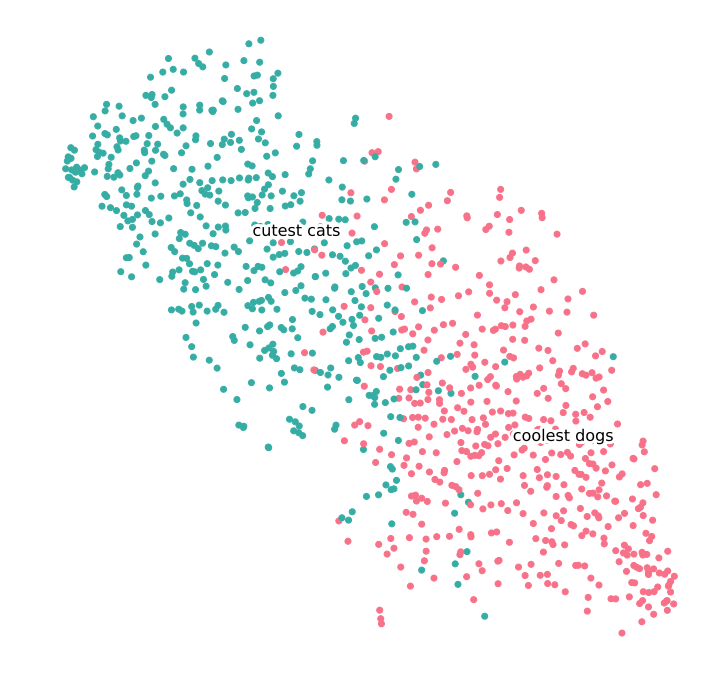

In [37]:
class_names = ['coolest dogs', 'cutest cats']
data_scatter(dog_cat_tsne, labels)